In [9]:
# matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
# get all files in /selected_sequences
import os
files = os.listdir('selected_sequences')
# keep only ones that end with .csv
files = [f for f in files if f.endswith('.csv')]
print(files)

['ABL_DROME_picked_sequences.csv', 'ACHA4_MOUSE_picked_sequences.csv', 'ANR17_HUMAN_picked_sequences.csv', 'CACB2_RABIT_picked_sequences.csv', 'DGLA_HUMAN_picked_sequences.csv', 'DOP1_HUMAN_picked_sequences.csv', 'K0513_MOUSE_picked_sequences.csv', 'KCNAS_DROME_picked_sequences.csv', 'MTUS2_HUMAN_picked_sequences.csv', 'PCLO_CHICK_picked_sequences.csv', 'PCLO_picked_sequences.csv', 'RIMS2_RAT_picked_sequences.csv', 'ROBO2_HUMAN_picked_sequences.csv', 'RUSC2_MOUSE_picked_sequences.csv', 'SCN1_HETBL_picked_sequences.csv', 'TRIM2_BOVIN_picked_sequences.csv', 'TWK7_CAEEL_picked_sequences.csv']


In [11]:
def create_heatmap(path):
    df = pd.read_csv(path)

    # convert A and G to 1 and 0
    df['seq_array'] = df['Sequence'].apply(lambda x: [1 if i == 'G' else 0 for i in x])
    # make into a matrix
    seq_matrix = np.array(df['seq_array'].tolist())
    # transpose
    seq_matrix = seq_matrix.T
    corr = np.corrcoef(seq_matrix)
    sns.heatmap(corr, cmap='coolwarm', center=0)
    path_png = path.replace('.csv', '.png')
    plt.savefig(path_png)
    plt.close()

for file in files:
    path = 'selected_sequences/' + file
    create_heatmap(path)
    print('created heatmap for', path)

created heatmap for selected_sequences/ABL_DROME_picked_sequences.csv
created heatmap for selected_sequences/ACHA4_MOUSE_picked_sequences.csv
created heatmap for selected_sequences/ANR17_HUMAN_picked_sequences.csv
created heatmap for selected_sequences/CACB2_RABIT_picked_sequences.csv
created heatmap for selected_sequences/DGLA_HUMAN_picked_sequences.csv
created heatmap for selected_sequences/DOP1_HUMAN_picked_sequences.csv
created heatmap for selected_sequences/K0513_MOUSE_picked_sequences.csv
created heatmap for selected_sequences/KCNAS_DROME_picked_sequences.csv
created heatmap for selected_sequences/MTUS2_HUMAN_picked_sequences.csv
created heatmap for selected_sequences/PCLO_CHICK_picked_sequences.csv
created heatmap for selected_sequences/PCLO_picked_sequences.csv
created heatmap for selected_sequences/RIMS2_RAT_picked_sequences.csv
created heatmap for selected_sequences/ROBO2_HUMAN_picked_sequences.csv
created heatmap for selected_sequences/RUSC2_MOUSE_picked_sequences.csv
create

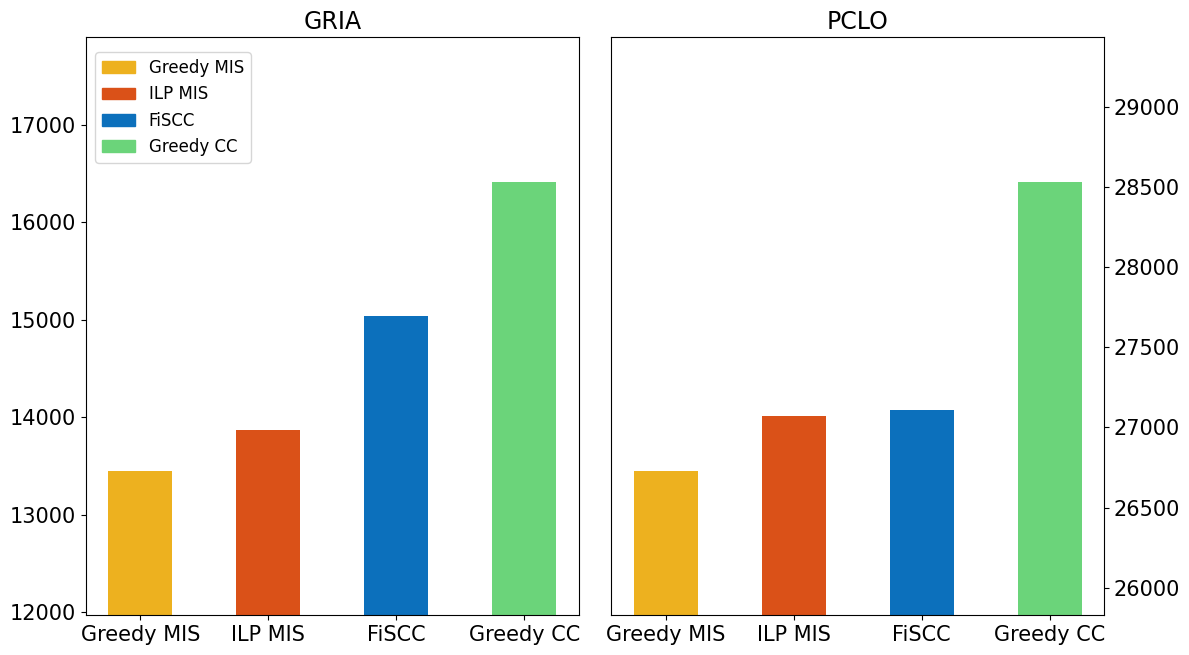

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'Long_reads_data.csv'
data = pd.read_csv(file_path)

# Extract data for plotting
transcripts = data['Transcript']
algorithms = ['Greedy MIS', 'ILP MIS', 'FiSCC', 'Greedy CC']

algorithms_renaming_dict = {
    'Greedy MIS': 'Greedy MIS',
    'ILP MIS': 'ILP MIS',
    'FiSCC': 'FiSCC',
    'Greedy Clique Cover': 'Greedy CC'
}

data = data.rename(columns=algorithms_renaming_dict)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

colors = {
    'FiSCC': '#0c70bc',
    'ILP MIS': '#da5118',
    'Greedy MIS': '#edb11f',
    'Greedy CC': '#6bd47a'
}

# Plot data for each transcript
for i, transcript in enumerate(transcripts):
    values = data.loc[i, algorithms]
    axes[i].bar(algorithms, values, color=[colors[algo] for algo in algorithms], width=0.5)
    axes[i].set_title(f'{transcript}', fontsize=17)

    if i % 2 == 1:
        axes[i].yaxis.tick_right()

    padding = (data.loc[i, algorithms].max() - data.loc[i, algorithms].min()) * 0.5
    upper_y_limit = data.loc[i, algorithms].max() + padding
    lower_y_limit = data.loc[i, algorithms].min() - padding
    axes[i].set_ylim([lower_y_limit, upper_y_limit])
    axes[i].set_xticks(algorithms)
    axes[i].tick_params(axis='y', labelsize=15)
    axes[i].tick_params(axis='x', labelsize=15)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[algo]) for algo in algorithms]
labels = algorithms
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.22, 0.88), fontsize=12)

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Algorithm_results_long.png")
plt.show()
